----
# Analysis of the SA optimization
----

We optimized Tree-Tensor Networks (TNNs) using Simulated Annealing (SA).  
Here we visalize and analyze the results.

Sections:
- <a href=#load>Load the dataframe</a>
- <a href=#next>WIP</a>

----
<a id='top'></a>

In [1]:
# Set working directory to be the main directory of the repo.
import os
#try:
#    was_cwd_initialized
#except NameError:
#    os.chdir('ttn_learning/')
#    was_cwd_initialized = True
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import matplotlib.pyplot as plt # Import graphical library for plots
import pandas as pd
import sys
sys.path.insert(0, 'ttn_demo')
sys.path.insert(0, 'ttn_learning')
import ttn

# Name of files and directories
data_path = 'ttn_learning/data/TTN_SA_data'

# FIXME: Currently there is no way to know the slurm_jobid
#        and slurm_procid if not manually.
slurm_jobid = '1696444007'
slurm_procid= '1696444007'
run = 0
L = 16
site_dim = 2
file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}'

working directory: /data/nfs_home/giangiac/pando-TN


<a id='load'></a>

----
## Load the dataframe and visualize its content

<a href=#top>Back to top</a>

In [4]:
with open(f'{data_path}/{file_id}_summary.pkl', 'rb') as f:
    df = pd.read_pickle(f)
print(df)
print(isinstance(df['state'][1], ttn.TTN))
print(isinstance(df['state'][2], ttn.TTN))

                                               state    energy
0  TTN([\n    Tensor(shape=(2, 2), inds=('p15', '... -7.989439
1  TTN([\n    Tensor(shape=(2, 2), inds=('p0', '_... -7.989305
2                                               None -7.987733
3                                               None -7.963964
4  TTN([\n    Tensor(shape=(2, 2), inds=('p0', '_... -7.974678
5  TTN([\n    Tensor(shape=(2, 2), inds=('p0', '_... -7.975364
True
False


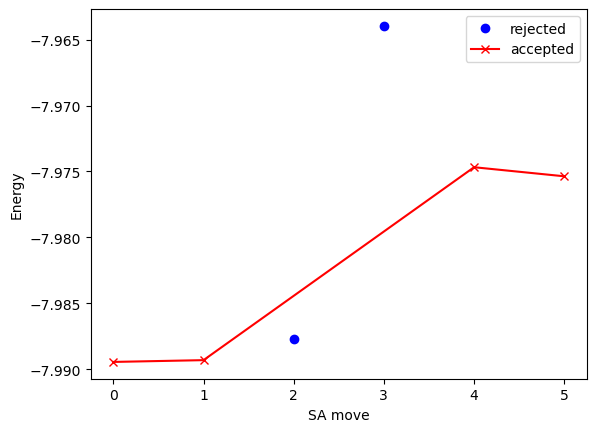

In [ ]:
fig, ax = plt.subplots()

# Plot the data with 'o' marker for states where 'state' is None
ax.plot(df.index[~df['state'].notna()], df['energy'][~df['state'].notna()],
        marker='o', linestyle='', color='b', label='rejected')

# Plot the data with 'x' marker for accepted states
ax.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='x', linestyle='', color='r', label='accepted')
# Alternative (not working) syntax:
#rejected_states = df[df['state'] == None]
#ax.plot(rejected_states.index, rejected_states['energy'], marker='o', linestyle='-', color='g', label='rejected')

# Add labels and legend
ax.set_xlabel('SA move')
ax.set_ylabel('Energy')
ax.legend()

# Display the plot
plt.show()

----
## END
----